In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
df = pd.read_csv('data/kc_house_data.csv')

In [255]:
proxy_school = pd.read_csv('data/ProxySchool.csv')


In [256]:
proxy_school

,kc_house_data_map4999: id_Orig,kc_house_data_map4999: zipcode,kc_house_data_map4999: lat,kc_house_data_map4999: long,Near_Layer: X,Near_Layer: Y,Near_Layer: Name,Near_Layer: ABB_NAME,Near_Layer: ADDRESS,Near_Layer: ZIPCODE,Near_Layer: LONG_CEN,Near_Layer: LAT_CEN,Near_Layer: SCH_CLASS,Near_Layer: DISTRICT,Near_Layer: PIN,Near_Layer: MAJOR,Near_Layer: MINOR,Near_Layer: FEATUREDES,Near_Layer: OSPI_CODE,Distance to School(miles)
0,3542300060,98056,47.5093,-122.184,-122.183727,47.505723,McKnight Middle School,McKnight,1200 Edmonds Ave NE,98056,-122.183729,47.505721,10,RENTON,423059048,42305,9048,School-Junior High/Middle,3035.0,0.246925
1,2222059065,98042,47.3777,-122.165,-122.170994,47.378334,Martin Sortun Elementary School,Martin Sortun,12711 SE 248th St,98030,-122.170997,47.378332,10,KENT,2122059018,212205,9018,School-Elementary,4294.0,0.284029
2,7551300060,98107,47.6750,-122.394,-122.392119,47.673499,Adams Elementary School,Adams,6110 28th Ave NW,98107,-122.392121,47.673498,10,SEATTLE,6658000060,665800,60,School-Elementary,2138.0,0.135536
3,100600550,98023,47.3025,-122.370,-122.378171,47.299870,Brigadoon Elementary School,Brigadoon,3601 SW 336th St,98023,-122.378175,47.299868,10,FEDERAL WAY,2321039003,232103,9003,School-Elementary,3700.0,0.423867
4,3211100860,98059,47.4787,-122.158,-122.147101,47.482407,Maplewood Heights Elementary School,Maplewood Heights,130 Jericho Ave SE,98059,-122.147104,47.482405,10,RENTON,847100090,84710,90,School-Elementary,3586.0,0.569822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,7859910110,98092,47.3211,-122.182,-122.175401,47.324998,Lea Hill Elementary School,Lea Hill,30908 124th Ave SE,98092,-122.175404,47.324996,10,AUBURN,921059005,92105,9005,School-Elementary,3525.0,0.409717
21593,7852120180,98065,47.5402,-121.875,-121.875817,47.532493,Cascade View Elementary School-Snoqualmie,Cascade View,34816 SE Ridge St,98065,-121.875818,47.532491,10,SNOQUALMIE VALLEY,2624079047,262407,9047,School-Elementary,5015.0,0.532602
21594,9268850180,98027,47.5400,-122.026,-122.045376,47.536629,Issaquah Valley Elementary School,Issaquah Valley,555 NW Holly St,98027,-122.045378,47.536627,10,ISSAQUAH,2824069012,282406,9012,School-Elementary,3673.0,0.933825
21595,6031400092,98168,47.4870,-122.320,-122.325166,47.484421,Cedarhurst Elementary School,Cedarhurst,611 S 132nd St,98168,-122.325168,47.484419,10,HIGHLINE,1446403320,144640,3320,School-Elementary,2926.0,0.299765


In [153]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [154]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

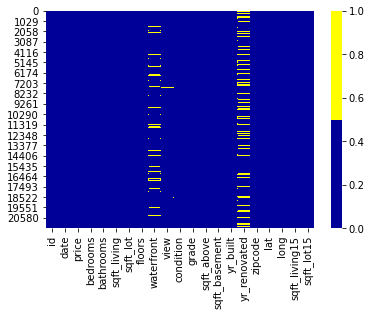

In [155]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [156]:

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
date - 0.0%
price - 0.0%
bedrooms - 0.0%
bathrooms - 0.0%
sqft_living - 0.0%
sqft_lot - 0.0%
floors - 0.0%
waterfront - 11.0%
view - 0.0%
condition - 0.0%
grade - 0.0%
sqft_above - 0.0%
sqft_basement - 0.0%
yr_built - 0.0%
yr_renovated - 18.0%
zipcode - 0.0%
lat - 0.0%
long - 0.0%
sqft_living15 - 0.0%
sqft_lot15 - 0.0%


In [157]:
# Adding Binary Column for Basement
df['sqft_basement'].replace(to_replace='?', value='0', inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')
df['has_basement'] = df['sqft_basement']
df.loc[df.has_basement > 0, 'has_basement'] = 1

In [158]:
# Converting to Datetime
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')

In [159]:
# Converting Waterfront to Binary
df['waterfront'] = df['waterfront'].fillna('0')
df['waterfront'].replace(to_replace='NO', value='0', inplace=True)
df['waterfront'].replace(to_replace='YES', value='1', inplace=True)
df['waterfront'] = pd.to_numeric(df['waterfront'],errors='coerce')

In [160]:
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [161]:
# Converting Grade to Numeric
df['grade'] = df['grade'].str.slice(0,2).str.strip()
df['grade'] = pd.to_numeric(df['grade'],errors='coerce')

In [162]:
# Creating Column for Renovations within last 10 years
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
df['renovated_less_10yrs'] = df['yr_renovated'] > 2010.0
df['renovated_less_10yrs'] = df['renovated_less_10yrs'].astype('int64')
df['renovated_less_10yrs'].value_counts()

0    21462
1      135
Name: renovated_less_10yrs, dtype: int64

In [163]:
# Converting condition to numeric
df['condition'].replace('Poor', '1', inplace=True)
df['condition'].replace('Fair', '2', inplace=True)
df['condition'].replace('Average', '3', inplace=True)
df['condition'].replace('Good', '4', inplace=True)
df['condition'].replace('Very Good', '5', inplace=True)
df['condition'] = df['condition'].astype(np.int64)

In [164]:
# Converting View to Numeric
df['view'].fillna('NONE', inplace=True)
df['view'].replace('NONE', '0', inplace=True)
df['view'].replace('FAIR', '1', inplace=True)
df['view'].replace('AVERAGE', '2', inplace=True)
df['view'].replace('GOOD', '3', inplace=True)
df['view'].replace('EXCELLENT', '4', inplace=True)
df['view'] = df['view'].astype(np.int64)

In [165]:
df.shape

(21597, 23)

###DROPPING OUTLIERS

In [166]:
price_mean = np.mean(df['price'])
cut_off = np.std(df['price']) * 3
df.drop(df[df['price'] > price_mean + cut_off].index, inplace = True)
df.drop(df[df['price'] < price_mean - cut_off].index, inplace = True)
df.drop(df[df['bedrooms'] > 15].index, inplace=True)


In [167]:
df.shape

(21190, 23)

Dropping Columns

In [242]:
df.drop('date', axis=1, inplace=True)

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

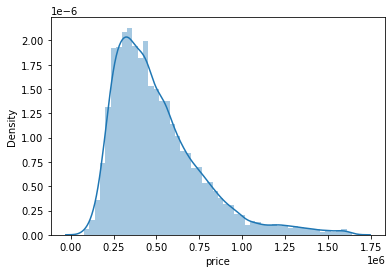

In [168]:
sns.distplot(df['price'])

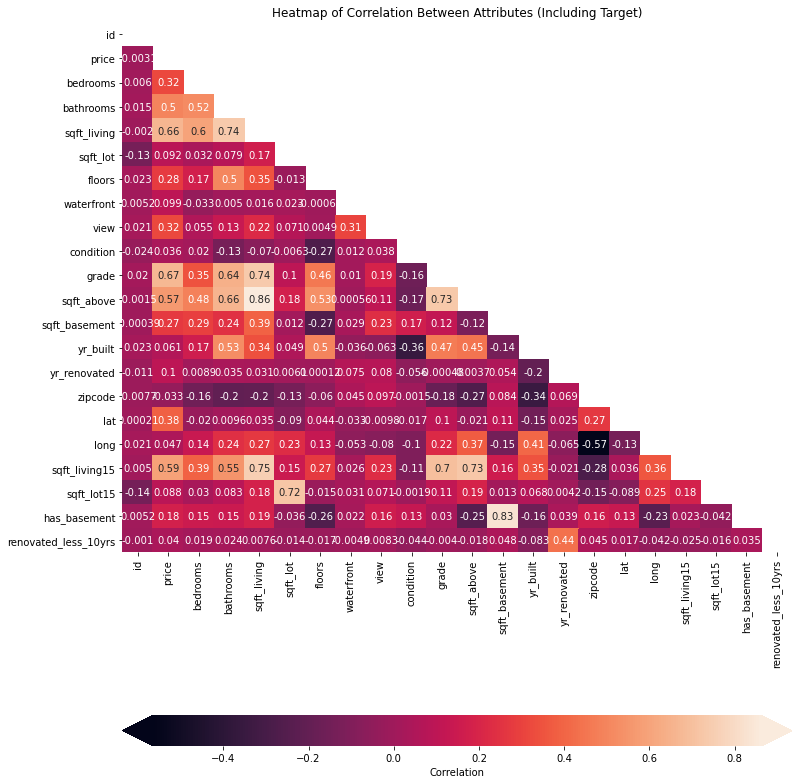

In [169]:
# Create a df with the target as the first column,
# then compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [170]:
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)


df_corr.rename(columns={0 : 'corr'}, inplace=True)
df_corr[(df_corr['corr'] > .6) & (df_corr['corr'] < 1) & df_corr['level_0'] == 'price']

,level_0,level_1,corr


In [171]:
other_cols = df.columns.drop(['price', 'date'])
formula = 'price ~ + {}'.format(' + '.join(other_cols))
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2510.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:23:58   Log-Likelihood:            -2.8099e+05
No. Observations:               21190   AIC:                         5.620e+05
Df Residuals:                   21168   BIC:                         5.622e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.558e+06   2.06e+06     -0.758      0.449   -5.59e+06    2.47e+06
id                   -5.893e-07   3.36e-07     -1.752      0.080   -1.25e-06    7.01e-08
bedrooms              -1.55e+04   1402.731    -11.053      0.000   -1.83e+04   -1.28e+04
bathrooms             2.728e+04   2331.256     11.704      0.000    2.27e+04    3.19e+04
sqft_living             78.3938     12.904      6.075      0.000      53.100     103.688
sqft_lot                 0.1793      0.034      5.227      0.000       0.112       0.246
floors                3.188e+04   2541.939     12.543      0.000    2.69e+04    3.69e+04
waterfront             2.08e+05   1.64e+04     12.655      0.000    1.76e+05     2.4e+05
view                  4.222e+04   1537.684     27.456      0.000    3.92e+04    4.52e+04
condition             2.835e+04   1639.850     17.285      0.000    2.51e+04    3.16e+04
grade                 8.698e+04   1531.392     56.796      0.000     8.4e+04       9e+04
sqft_above              17.5054     12.865      1.361      0.174      -7.710      42.721
sqft_basement           -7.5746     13.378     -0.566      0.571     -33.797      18.648
yr_built             -2138.9798     50.671    -42.213      0.000   -2238.300   -2039.660
yr_renovated            16.4395      3.128      5.256      0.000      10.309      22.570
zipcode               -355.4185     23.092    -15.392      0.000    -400.680    -310.157
lat                   5.673e+05   7456.258     76.079      0.000    5.53e+05    5.82e+05
long                 -1.068e+05   9202.202    -11.605      0.000   -1.25e+05   -8.88e+04
sqft_living15           48.0582      2.506     19.177      0.000      43.146      52.970
sqft_lot15              -0.1722      0.051     -3.346      0.001      -0.273      -0.071
has_basement          2.278e+04   3782.682      6.023      0.000    1.54e+04    3.02e+04
renovated_less_10yrs  3.767e+04   1.35e+04      2.796      0.005    1.13e+04    6.41e+04
==============================================================================
Omnibus:                     4785.036   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18513.573
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       7.032   Cond. No.                     1.17e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

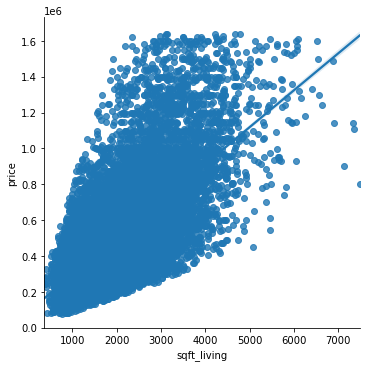

In [172]:

sns.lmplot(x='sqft_living', y='price', data=df)  

In [269]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [272]:
df.shape

(21190, 22)

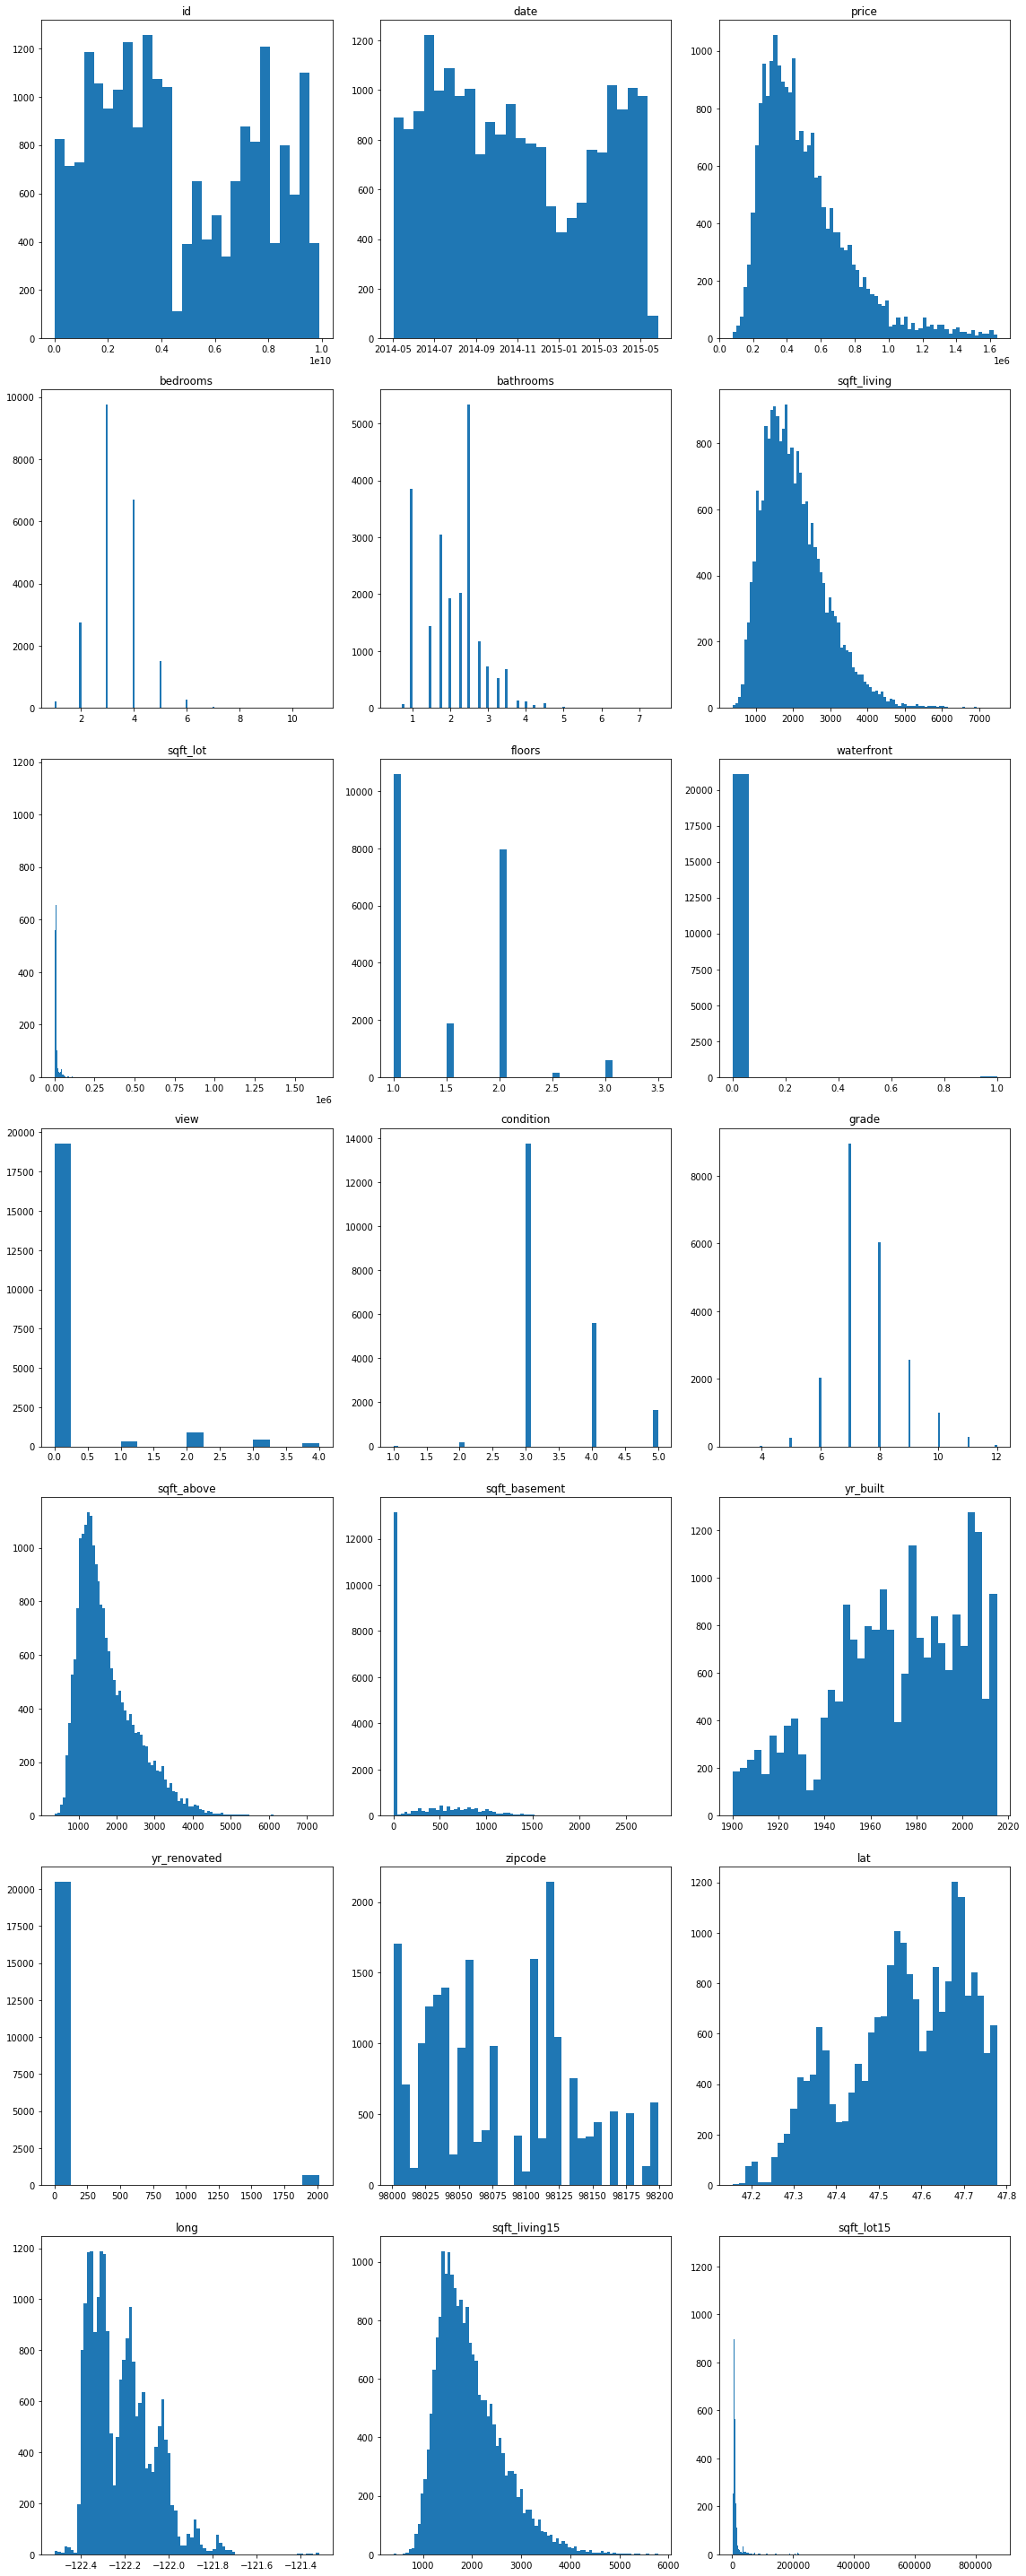

In [174]:
fig, axes = plt.subplots(nrows=(df.shape[1] // 3), ncols=3, figsize=(16,40))

columns = df.columns

for col, ax in zip(columns, axes.flatten()):
    ax.hist(df[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [175]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,renovated_less_10yrs
id,1.000000,-0.003088,0.006001,0.014560,-0.001958,-0.132582,0.023273,0.005240,0.021090,-0.024123,...,-0.000393,0.023014,-0.011242,-0.007705,0.000213,0.020990,0.005036,-0.138807,0.005155,-0.001029
price,-0.003088,1.000000,0.318745,0.495675,0.664626,0.091610,0.277962,0.098977,0.316777,0.036180,...,0.274630,0.060512,0.100038,-0.032632,0.384495,0.046542,0.594993,0.088080,0.178507,0.040401
bedrooms,0.006001,0.318745,1.000000,0.517370,0.598567,0.031840,0.172777,-0.033008,0.055165,0.020216,...,0.291821,0.165069,0.008932,-0.155537,-0.020221,0.141942,0.392061,0.030064,0.152822,0.018585
bathrooms,0.014560,0.495675,0.517370,1.000000,0.735673,0.078987,0.504537,0.004964,0.134630,-0.134420,...,0.243847,0.527974,0.034553,-0.203148,0.009617,0.239475,0.549323,0.082588,0.147023,0.024241
sqft_living,-0.001958,0.664626,0.598567,0.735673,1.000000,0.169519,0.349647,0.015634,0.218948,-0.070026,...,0.393207,0.342927,0.031077,-0.201286,0.034624,0.268985,0.751784,0.184981,0.187795,0.007641
sqft_lot,-0.132582,0.091610,0.031840,0.078987,0.169519,1.000000,-0.012959,0.022897,0.070874,-0.006337,...,0.011613,0.048918,0.006090,-0.130779,-0.090094,0.227292,0.145267,0.719154,-0.036157,-0.014306
floors,0.023273,0.277962,0.172777,0.504537,0.349647,-0.012959,1.000000,-0.000644,0.004891,-0.270735,...,-0.268051,0.498488,0.000118,-0.060120,0.044307,0.129954,0.272506,-0.014902,-0.263395,-0.017490
waterfront,0.005240,0.098977,-0.033008,0.004964,0.015634,0.022897,-0.000644,1.000000,0.305590,0.012290,...,0.028794,-0.036346,0.074859,0.044967,-0.032741,-0.053369,0.025519,0.030614,0.021549,-0.004892
view,0.021090,0.316777,0.055165,0.134630,0.218948,0.070874,0.004891,0.305590,1.000000,0.038374,...,0.233342,-0.062927,0.080257,0.097030,-0.009773,-0.079595,0.231977,0.070661,0.162051,0.008259
condition,-0.024123,0.036180,0.020216,-0.134420,-0.070026,-0.006337,-0.270735,0.012290,0.038374,1.000000,...,0.169126,-0.357553,-0.055921,-0.001520,-0.016836,-0.103527,-0.106914,-0.001927,0.127244,-0.044448


In [216]:
# Define X and y
# X = df.drop(columns=['price', 'date'])
X = df[['sqft_living', 'grade']]
y = df['price']

In [217]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [222]:
lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
  
lm_dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)
y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)
y_predict_dummy_median = lm_dummy_median.predict(X_test)

In [223]:
print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
  
print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(y_test, 
                                                                    y_predict_dummy_median)))
print("Median absolute error (linear model): {:.2f}".format(median_absolute_error(y_test, y_predict)))
  
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(r2_score(y_test, y_predict_dummy_median)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [  113.88295443 94395.07344124]
Mean squared error (dummy): 68011126976.56
Mean squared error (linear model): 33401485712.02
Median absolute error (dummy): 148000.00
Median absolute error (linear model): 111706.40
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.06
r2_score (linear model): 0.51


In [ ]:
# Make a train df so we can see X versus y in our train data
train_df = pd.concat([X_train, y_train], axis=1)

In [ ]:
sns.pairplot(train_df)
plt.show()

In [ ]:
# check all correlations using the same Pearson's correlation coefficient
train_df.corr()['price']

In [ ]:
# Copying original dataframe
train_df_copy = train_df.copy()

scaler = StandardScaler()
train_df_copy = scaler.fit_transform(train_df_copy)

pd.DataFrame(train_df_copy)

In [243]:

my_sample = df.sample(1)
my_sample_price = my_sample.iloc[0, 0]
my_sample_pt = my_sample.drop('price', axis=1)

# Show my random sample off
print(f'Price of sample: ${my_sample_price}')
my_sample_pt

Price of sample: $1723049624


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,renovated_less_10yrs
9975,1723049624,5,3.0,2100,7715,1.0,0,0,3,7,...,850.0,2013,0.0,98168,47.4866,-122.319,2100,7959,1.0,0


In [244]:
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    '''
    Takes in features & targets from `data` to train a linear regression with a
    random sample `ntimes`. It then returns a list of R2 scores, RMSEs, and the 
    predictions from a provided data point of features `sample_pt`.
    '''
    # To save all of our predictions
    r2 = []
    rmse = []
    # Only return predictions if there is something to predict (sample_pt given)
    point_preds = [] if (sample_pt is not None) else None

    # We'll repeat this little experiment to see how the model does
    for i in range(ntimes):
        # Creating a random sample of data to train on
        df_sample = data.sample(5000, replace=True)
        y = df_sample.price
        X = df_sample.drop('price', axis=1)

        # Our linear regression model about to be trained
        lr = LinearRegression()
        lr.fit(X, y)

        # Making predictions & evaluating on the data we used to train the model
        y_hat = lr.predict(X)
        rmse.append(np.sqrt(mean_squared_error(y, y_hat)))
        r2.append(lr.score(X, y))

        # Making a prediction on the one point the model definitely never saw
        if sample_pt is not None:
            y_hat_pt = lr.predict(sample_pt)
            # Getting just the single point to add into list
            point_preds.append(y_hat_pt[0])
    
    return r2, rmse, point_preds

In [239]:
dum_df = df[['price', 'sqft_living', 'grade']].copy()
dum_df

,price,sqft_living,grade
0,221900.0,1180,7
1,538000.0,2570,7
2,180000.0,770,6
3,604000.0,1960,7
4,510000.0,1680,8
...,...,...,...
21592,360000.0,1530,8
21593,400000.0,2310,8
21594,402101.0,1020,7
21595,400000.0,1600,8


In [245]:
# Run 100 linear regression trainings on some random data from df and compare
# it with the random sample point
r2_simple, rmse_simple, pt_preds_simple = train_lr_randomly(
                                                        data=df, 
                                                        sample_pt=my_sample_pt,
                                                        ntimes=100                            
)

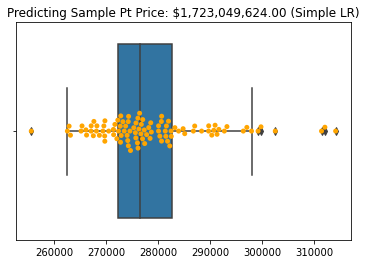

In [246]:

ax = sns.boxplot(x=pt_preds_simple);
ax = sns.swarmplot(x=pt_preds_simple, color='orange', ax=ax)
ax.set_title(f'Predicting Sample Pt Price: ${my_sample_price:,.2f} (Simple LR)');

In [250]:
pf = PolynomialFeatures(2)

df_poly = pd.DataFrame(pf.fit_transform(df))
df_poly.index = df.index
df_poly['price'] = df['price']

cols = list(df_poly)

# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('price')))

df_poly = df_poly.loc[:, cols]

df_poly.head(10)

,price,0,1,2,3,4,5,6,7,8,...,266,267,268,269,270,271,272,273,274,275
0,221900.0,1.0,7.129301e+09,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,...,1795600.0,7571000.0,0.0,0.0,3.192250e+07,0.0,0.0,0.0,0.0,0.0
1,538000.0,1.0,6.414100e+09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,...,2856100.0,12909910.0,1690.0,0.0,5.835432e+07,7639.0,0.0,1.0,0.0,0.0
2,180000.0,1.0,5.631500e+09,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,...,7398400.0,21928640.0,0.0,0.0,6.499584e+07,0.0,0.0,0.0,0.0,0.0
3,604000.0,1.0,2.487201e+09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,...,1849600.0,6800000.0,1360.0,0.0,2.500000e+07,5000.0,0.0,1.0,0.0,0.0
4,510000.0,1.0,1.954401e+09,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,...,3240000.0,13505400.0,0.0,0.0,5.629501e+07,0.0,0.0,0.0,0.0,0.0
5,1230000.0,1.0,7.237550e+09,1230000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,...,22657600.0,485186800.0,4760.0,0.0,1.038972e+10,101930.0,0.0,1.0,0.0,0.0
6,257500.0,1.0,1.321400e+09,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,...,5008644.0,15260922.0,0.0,0.0,4.649876e+07,0.0,0.0,0.0,0.0,0.0
7,291850.0,1.0,2.008000e+09,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,...,2722500.0,16023150.0,0.0,0.0,9.430352e+07,0.0,0.0,0.0,0.0,0.0
8,229500.0,1.0,2.414600e+09,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,...,3168400.0,14441140.0,1780.0,0.0,6.582077e+07,8113.0,0.0,1.0,0.0,0.0
9,323000.0,1.0,3.793500e+09,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,...,5712100.0,18092300.0,0.0,0.0,5.730490e+07,0.0,0.0,0.0,0.0,0.0


In [251]:
# Let's make sure we have another sample point to test our models
my_sample_pt_poly = pf.transform(my_sample_pt)

# Show my random sample off
print(f'Price of sample: ${my_sample_price}')
my_sample_pt_poly.shape

ValueError: X shape does not match training shape

In [275]:
def linearity_plot(x, y, cols):
    x = pd.DataFrame(x)
    y = pd.DataFrame(y)
    num_rows = df.shape[1] // cols if df.shape[1] // cols > 0 else 1
    
    fig, axes = plt.subplots(ncols=cols, nrows=num_rows, figsize=(12,8), squeeze=False)
    fig.set_tight_layout(True)
    
    for index, col in enumerate(x.columns):
        ax = axes[index//cols][index%cols]
        ax.scatter(x[col], y, alpha=0.2)
        ax.set_xlabel(col)
        ax.set_ylabel("listing price")